In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error ,r2_score
import matplotlib.pyplot as plt

In [2]:
x = np.array([[1],[2],[3],[4]])
y = np.array([2,4,6,8])    #y=2x ---> w=2 , b=0

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)
y_pred_lin = lin_reg.predict(x)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[2.]
0.0


In [4]:
#Ridge
lin_ridge = Ridge(alpha=10.0)  # remove feature(feature selection)
lin_ridge.fit(x,y)
y_pred_ridge = lin_ridge.predict(x)
print(lin_ridge.coef_)  # nearest to zero not equal zero
print(lin_ridge.intercept_)


[0.66666667]
3.3333333333333335


In [5]:
lin_lasso = Lasso(alpha=10.0)
lin_lasso.fit(x,y)
y_pred_lasso = lin_lasso.predict(x)
print(lin_lasso.coef_)  #equal to zero 
print(lin_lasso.intercept_)

[0.]
5.0


In [6]:
print("linear Regression")
print("mse:",mean_squared_error(y,y_pred_lin))
print("r2score:",r2_score(y,y_pred_lin))
print("=================================")


print("Ridge Regression")
print("mse:",mean_squared_error(y,y_pred_ridge))
print("r2score:",r2_score(y,y_pred_ridge))
print("=================================")


print("lasso Regression")
print("mse:",mean_squared_error(y,y_pred_lasso))
print("r2score:",r2_score(y,y_pred_lasso))
print("=================================")

linear Regression
mse: 0.0
r2score: 1.0
Ridge Regression
mse: 2.2222222222222223
r2score: 0.5555555555555556
lasso Regression
mse: 5.0
r2score: 0.0


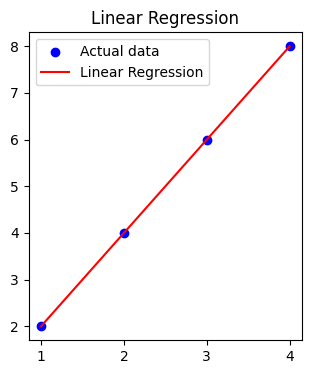

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(x,y,color = 'blue',label = "Actual data")
plt.plot(x,y_pred_lin,color = 'red' ,label="Linear Regression")
plt.title("Linear Regression")
plt.legend()


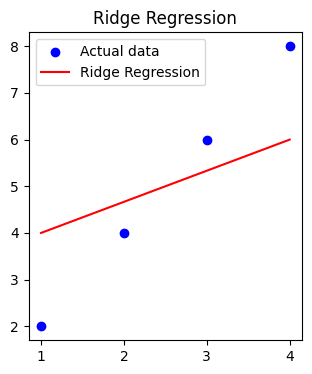

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(x,y,color = 'blue',label = "Actual data")
plt.plot(x,y_pred_ridge,color = 'red' ,label="Ridge Regression")
plt.title("Ridge Regression")
plt.legend()

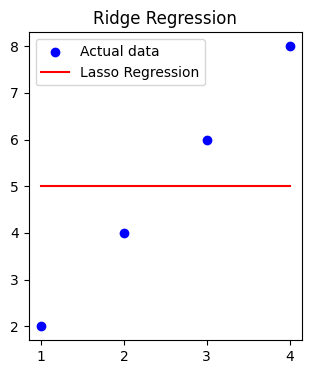

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(x,y,color = 'blue',label = "Actual data")
plt.plot(x,y_pred_lasso,color = 'red' ,label="Lasso Regression")
plt.title("Ridge Regression")
plt.legend()

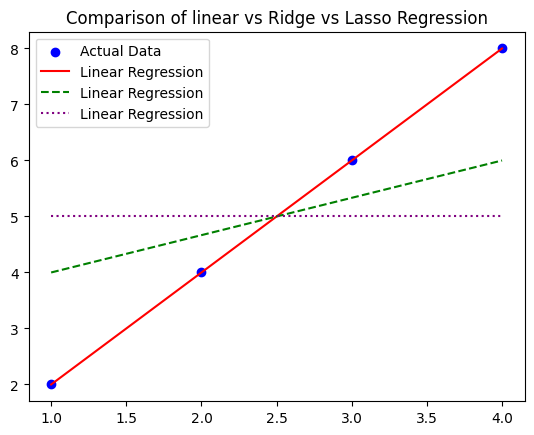

In [10]:
plt.scatter(x,y,color = "blue",label="Actual Data")
plt.plot(x,y_pred_lin,color="red",label="Linear Regression")
plt.plot(x,y_pred_ridge,color="green",linestyle="--",label="Linear Regression")
plt.plot(x,y_pred_lasso,color="purple",linestyle=":",label="Linear Regression")
plt.title("Comparison of linear vs Ridge vs Lasso Regression")
plt.legend()
plt.show()

In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [12]:
data =  pd.read_csv('salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
x = data.iloc[:,:-1]
y = data.iloc[:,1]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=52)

<Figure size 300x300 with 0 Axes>

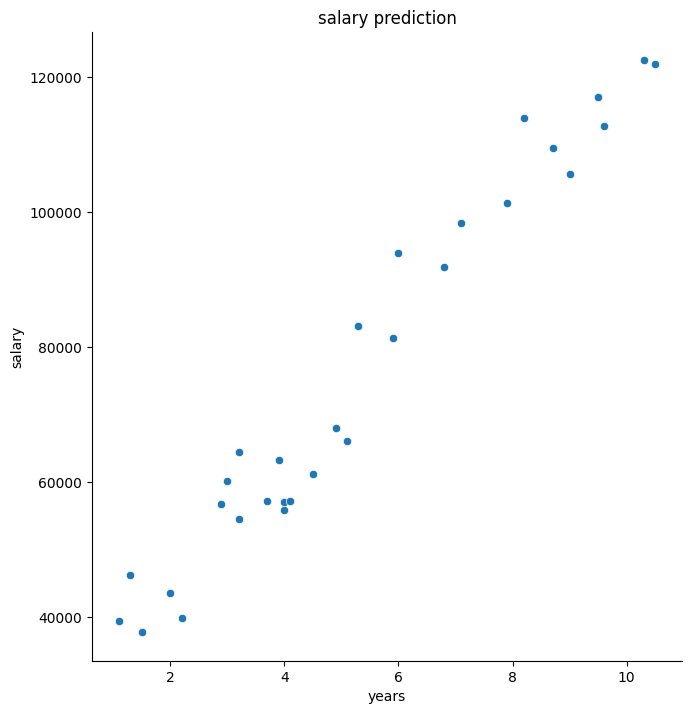

In [21]:
plt.figure(figsize=(3,3))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("years")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly_train = poly.fit_transform(x_train) 
x_poly_test = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
y_poly_pred_train = poly_model.predict(x_poly_train)
y_poly_pred_test = poly_model.predict(x_poly_test)

In [32]:
x_range = np.linspace(x.min(),x.max(),100).reshape(-1,1)
x_range_poly = poly.transform(x_range)
#print(x_range_poly)
y_range_pred = poly_model.predict(x_range_poly)
print(y_range_pred)

[ 41493.43924559  41692.23103614  41928.24638545  42200.70690614
  42508.83421087  42851.84991224  43228.9756229   43639.43295549
  44082.44352262  44557.22893693  45063.01081106  45599.01075763
  46164.45038928  46758.55131864  47380.53515834  48029.62352101
  48705.03801929  49406.0002658   50131.73187318  50881.45445406
  51654.38962107  52449.75898685  53266.78416402  54104.68676522
  54962.68840307  55840.01069022  56735.87523928  57649.50366291
  58580.11757371  59526.93858434  60489.18830741  61466.08835557
  62456.86034143  63460.72587765  64476.90657683  65504.62405163
  66543.09991466  67591.55577857  68649.21325598  69715.29395953
  70789.01950184  71869.61149555  72956.29155329  74048.2812877
  75144.80231139  76245.07623702  77348.3246772   78453.76924457
  79560.63155176  80668.1332114   81775.49583613  82881.94103858
  83986.69043137  85088.96562714  86187.98823853  87282.97987816
  88373.16215866  89457.75669267  90535.98509282  91607.06897174
  92670.22994206  93724.68

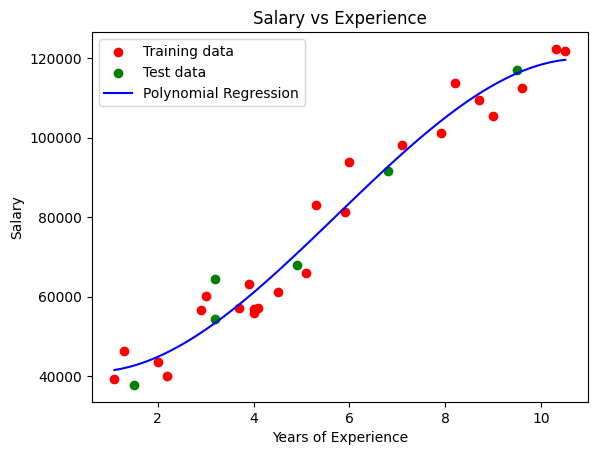

In [30]:
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Test data')

plt.plot(x_range, y_range_pred, color='blue', label='Polynomial Regression')

plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.legend()
plt.show()


In [35]:
mse = mean_squared_error(y_test,y_poly_pred_test)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test,y_poly_pred_test)
r2 = r2_score(y_test,y_poly_pred_test)
print(r2)

0.9604025352778552
